In [1]:
import pandas as pd
import re
from scipy import stats
from sklearn.kernel_ridge import KernelRidge
import numpy as np
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder, Imputer
from scipy.stats import skew
from sklearn.linear_model import Lasso
import xgboost as xgb
import lightgbm as lgb
from random import shuffle
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pprint import pprint
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn import linear_model
import seaborn as sns
from sklearn.svm import SVC
from time import time
import numpy as np
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', sep =',', error_bad_lines = False)
test = pd.read_csv('test.csv', sep =',', error_bad_lines = False)
testid= pd.read_csv('test.csv', sep =',', error_bad_lines = False)
testid.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)
print("The test  data size after dropping Id is : {} ".format(test.shape))
print("The train data size after droppin Id is : {} ".format(train.shape))
train.columns

The test  data size after dropping Id is : (1459, 79) 
The train data size after droppin Id is : (1460, 80) 


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## - Analysing 'SalePrice'

- Le prix de vente moyen d'une maison dans notre ensemble de données est proche de 180 000 , la plupart des valeurs se situant entre 130 000  et 215 000 .

In [4]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- Il est utile de transformer la variable cible en notation logée lorsqu'elle est asymétrique. Une des raisons à cela est d'améliorer la linéarité des données.

Skew is: 0.12133506220520406


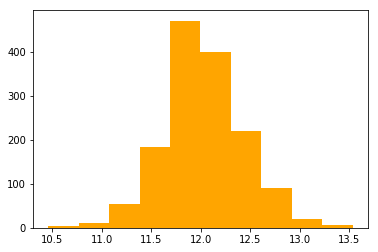

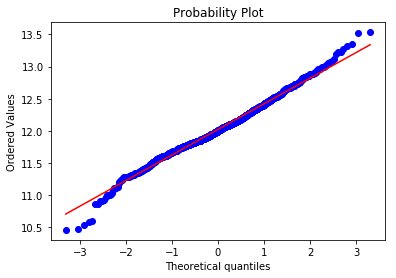

In [5]:
#histogram
outcome = np.log(train.SalePrice)
print ("Skew is:", outcome.skew())
plt.hist(outcome, color='orange')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(np.log(train['SalePrice']),  plot=ax)
 # a vakue close to 0 , means that we have improved the skewness of the data. Now we can 
    # see that we have a normal ditribution

In [6]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


<h1>Exploration des predicteurs<h1>

- On remarque que les variables numeriques a forte correlation avec notre outcome SalePrice sont les suivants :

-- OverallQuali

-- GrLivArea

-- GarageCars

-- GarageArea

-- ...

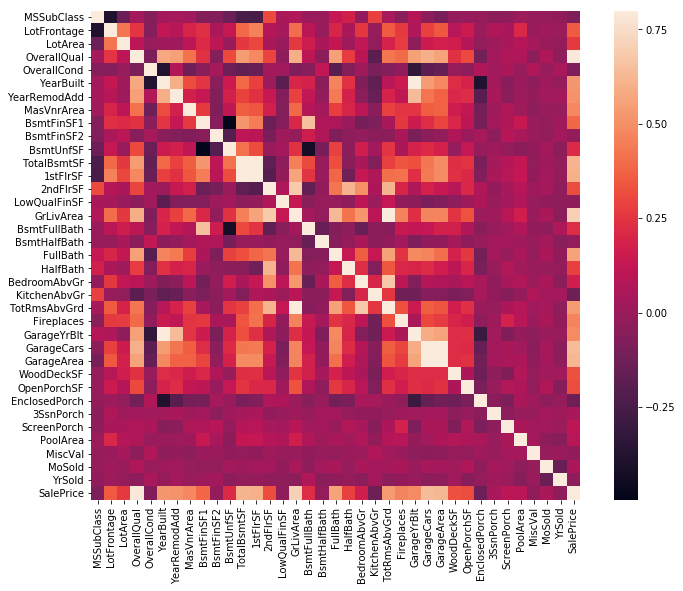

In [7]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

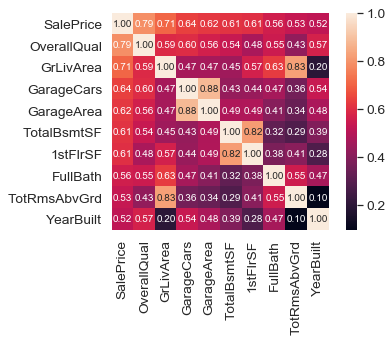

In [8]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Notre lecture du heatmap initial a ete confirmee par les valeurs de correlations obtenues.

- OverallQual , GrLivArea, GarageCars sont fortement correlees a SalePrice

- GarageCars et GarageArea figurent également parmi les variables les plus corrélées. Cependant le nombre de voitures qui entrent dans le garage est une conséquence de la zone de garage. Par conséquent, nous avons besoin d'une de ces variables dans notre analyse (nous pouvons conserver "GarageCars" car sa corrélation avec "SalePrice" est plus élevée.

- TotalBsmtSf, FullBath, YearBuilt sont aussi nettement correleee a la variable de sortie.

## Processing of the data

In [9]:
# les valeurs uniques de la variable
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

- Nous pouvons créer un pivot table dynamique pour approfondir la relation entre OverallQual et SalePrice.  Nous avons choisi de regarder la médiane ici.

In [10]:
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)
quality_pivot 

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


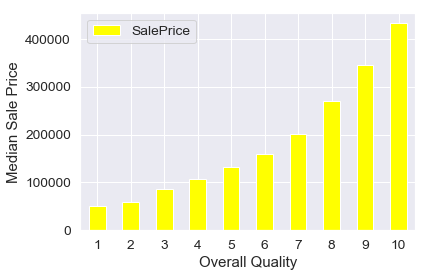

In [11]:
quality_pivot.plot(kind='bar', color='yellow')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
# on note que le prix de vente augmente strictement lorsque la qualité globale augmente.

- On remarque qu'il y a aussi quelques points aberrants. Les valeurs aberrantes peuvent affecter un modèle de régression en éloignant notre ligne de régression estimée de la droite de régression de la population réelle. Donc, nous allons supprimer ces observations de nos données

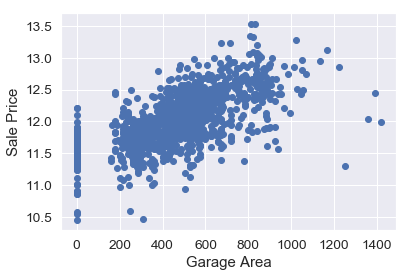

In [12]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

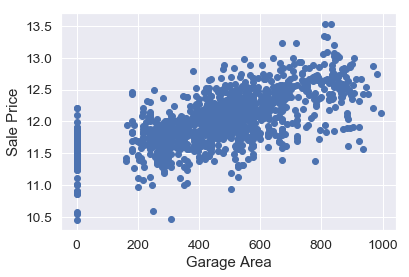

In [13]:
train = train[train['GarageArea'] < 1000]
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

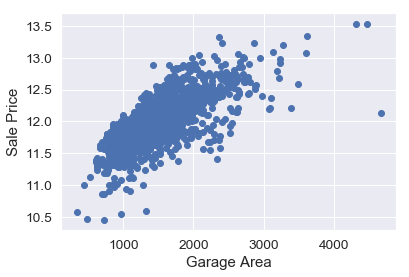

In [14]:
plt.scatter(x=train['GrLivArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

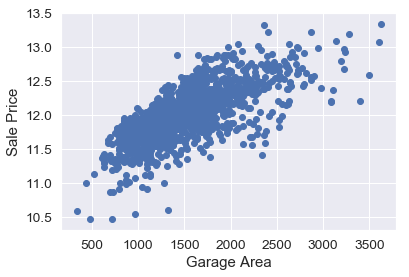

In [15]:
train = train[train['GrLivArea'] < 4000]
plt.scatter(x=train['GrLivArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

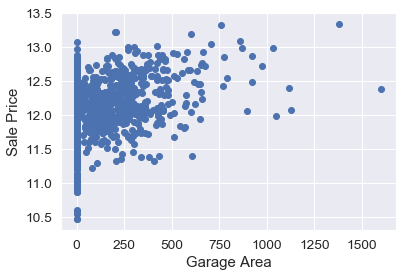

In [16]:
plt.scatter(x=train['MasVnrArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [17]:
train = train[train['LotArea'] < 100000]
train = train[train['LotFrontage'] < 200]
train = train[train['MasVnrArea'] < 1000]

test.shape

(1459, 79)

<function matplotlib.pyplot.show(*args, **kw)>

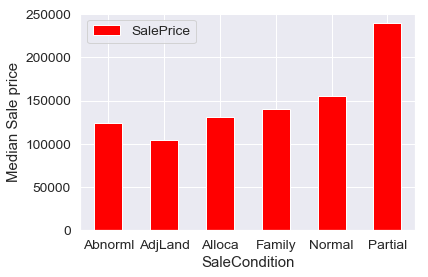

In [18]:
condition=train.pivot_table(index ='SaleCondition' , values='SalePrice' , aggfunc= np.median)
condition.plot(kind='bar' , color='red')
plt.xlabel('SaleCondition')
plt.ylabel('Median Sale price')
plt.xticks(rotation=0)
plt.show

- Partial has a significantly higher median than other categories.

- I will now encode this variable by selecting all the houses where SaleCondition equals partial and assign the value 1, and assogn 0 to other houses

In [19]:
def encode (x): return 1 if x=='Partial' else 0
train['EncodedCondition']= train.SaleCondition.apply(encode)
test['EncodedCondition']= test.SaleCondition.apply(encode)
train.shape

(1172, 81)

In [20]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.658703
MiscFeature,96.757679
Alley,92.918089
Fence,80.716724
FireplaceQu,50.767918
GarageCond,6.313993
GarageQual,6.313993
GarageFinish,6.313993
GarageYrBlt,6.313993
GarageType,6.313993


Text(0.5, 1.0, 'Percent missing data by feature')

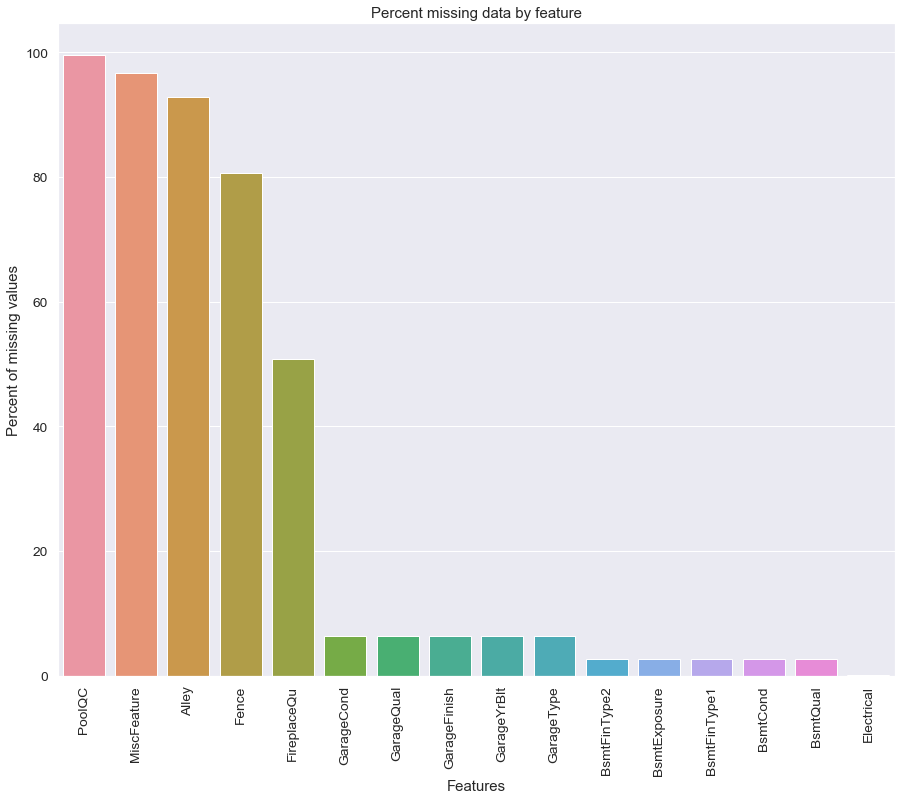

In [21]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Combine the data set 

In [22]:
#combine the data set
alldata = train.append(test)
alldata.shape

C:\Users\khalid\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(2631, 81)

## Feature Engenieering

In [23]:
#impute lotfrontage by median of neighborhood
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
                alldata.loc[idx, 'LotFrontage'] = group.median()

In [24]:
#importing function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
        if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
        le.fit(data[var])
        data[var] = le.transform(data[var])
        return data

In [25]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

#encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(alldata, x)

#encode variables and impute missing values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

In [26]:
#The level with highest count is kept as 1 and rest as 0
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1


alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1


alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

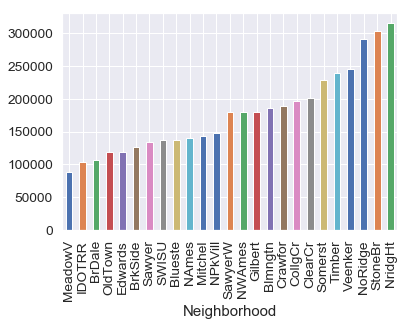

In [27]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]


#grouping neighborhood variable based on this plot
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

In [28]:
alldata.shape

(2631, 104)

## Filling Missing Values

In [29]:
def fill_missing_train_new(column, value):
    train_new.loc[train_new[column].isnull(),column] = value
    
def fill_missing_test_new(column, value):
    test_new.loc[test_new[column].isnull(),column] = value

In [30]:
#create new data
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]
train_new.shape

(1172, 104)

In [31]:
train_new=train_new.drop(['PoolQC'], axis=1)
#train=train.drop(['MiscFeature'], axis=1)
#train=train.drop(['Alley'], axis=1)
#train=train.drop(['Fence'], axis=1)
train_new['MiscFeature'] = train_new['MiscFeature'].fillna('None')
train_new['Alley'] = train_new['Alley'].fillna('None')
train_new['Fence'] = train_new['Fence'].fillna('None')


test_new=test_new.drop(['PoolQC'], axis=1)
#test=test.drop(['MiscFeature'], axis=1)
#test=test.drop(['Alley'], axis=1)
#test=test.drop(['Fence'], axis=1)
test_new['MiscFeature'] = test_new['MiscFeature'].fillna('None')
test_new["Alley"] = test_new["Alley"].fillna("None")
test_new["Fence"] = test_new["Fence"].fillna("None")


In [32]:

train_new['MasVnrArea'].fillna(0, inplace=True)
test_new['MasVnrArea'].fillna(0, inplace=True)


In [33]:
train_new['MasVnrType'].fillna('None', inplace=True)
test_new['MasVnrType'].fillna('None', inplace=True)


In [34]:
# Si une categorie est inconnue je la remplace avec la plus frequente -  train

train_new['Electrical']=train_new['Electrical'].fillna('SBrkr')
train_new['Exterior1st'] = train_new['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train_new['Exterior2nd'] = train_new['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train_new['KitchenQual'] = train_new['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train_new['SaleType'] = train_new['SaleType'].fillna(train['SaleType'].mode()[0])
fill_missing_train_new('Functional', 'Typ')

# Si une categorie est inconnue je la remplace avec la plus frequente -test

test_new['Electrical']=test_new['Electrical'].fillna('SBrkr')
test_new['Exterior1st'] = test_new['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test_new['Exterior2nd'] = test_new['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test_new['KitchenQual'] = test_new['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test_new['SaleType'] = test_new['SaleType'].fillna(test['SaleType'].mode()[0])
fill_missing_test_new('Functional', 'Typ')

In [35]:
for col in ( 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtQual'):
    train_new[col] = train_new[col].fillna('None')
    test_new[col] = test_new[col].fillna('None')


In [36]:
train_new = train_new.drop(['Utilities'], axis=1)
test_new = test_new.drop(['Utilities'], axis=1)

In [37]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_new[col] = train_new[col].fillna(0)
    train_new[col] = test_new[col].fillna(0)

In [38]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageFinish','GarageCars','GarageArea']
for column in garage_cols:
    if column != 'GarageCars' and column != 'GarageArea':
      
        fill_missing_train_new(column, 'none')
        fill_missing_test_new(column, 'none')
    else:
        train_new['GarageCars']= train_new.GarageCars.fillna(0)
        train_new['GarageArea']= train_new.GarageArea.fillna(0)
        test_new['GarageCars']= test_new.GarageCars.fillna(0)
        test_new['GarageArea']= test_new.GarageArea.fillna(0)

test_new[test_new['GarageType'].isnull()].shape

(0, 102)

<function matplotlib.pyplot.show(*args, **kw)>

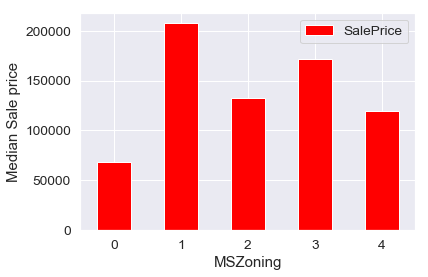

In [39]:
condition=train_new.pivot_table(index ='MSZoning' , values='SalePrice' , aggfunc= np.median)
condition.plot(kind='bar' , color='red')
plt.xlabel('MSZoning')
plt.ylabel('Median Sale price')
plt.xticks(rotation=0)
plt.show

In [40]:
train_new['MSZoning'] = train_new['MSZoning'].fillna(train_new['MSZoning'].mode()[0])

test_new['MSZoning'] = test_new['MSZoning'].fillna(test_new['MSZoning'].mode()[0])


In [41]:
fill_missing_train_new('BsmtFinSF1', 0)
fill_missing_train_new('BsmtFinSF2', 0)
fill_missing_train_new('BsmtUnfSF', 0)
fill_missing_train_new('TotalBsmtSF', 0)
fill_missing_train_new('BsmtFullBath', 0)
fill_missing_train_new('BsmtHalfBath', 0)

fill_missing_test_new('BsmtFinSF1', 0)
fill_missing_test_new('BsmtFinSF2', 0)
fill_missing_test_new('BsmtUnfSF', 0)
fill_missing_test_new('TotalBsmtSF', 0)
fill_missing_test_new('BsmtFullBath', 0)
fill_missing_test_new('BsmtHalfBath', 0)


In [42]:
train_new['MSSubClass'] = train_new['MSSubClass'].fillna("None")
test_new['MSSubClass'] = test_new['MSSubClass'].fillna("None")

train_new["FireplaceQu"] = train_new["FireplaceQu"].fillna("None")
test_new["FireplaceQu"] = test_new["FireplaceQu"].fillna("None")

## Certaines des valeurs manquantes peuvent être déduites d'autres valeurs pour cette propriété donnée. GarageYearBuilt devrait être au plus tôt l'année de la construction de la maison. De même, TotalBasementSQFeet devrait être égal à la superficie en pieds carrés du premier étage.
    

In [43]:
train_new['GarageYrBlt'] = train_new['GarageYrBlt'].fillna(0)
test_new['GarageYrBlt'] = test_new['GarageYrBlt'].fillna(0)
    

In [44]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_new[col] = train_new[col].fillna(0)
    test_new[col] = test_new[col].fillna(0)

In [45]:
sale_price_month = train_new['SalePrice'].groupby(train_new['MoSold']).mean().to_dict()
train_new['MonthSaledMeanPrice'] = train_new['MoSold'].replace(sale_price_month)
test_new['MonthSaledMeanPrice'] = test_new["MoSold"].replace(sale_price_month)
sale_month = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0, "6": 0, "7": 0, "8": 0, "9": 0, "10": 0, "11": 0, "12": 0}
for m in train_new['MoSold'].values:
    sale_month[str(m)] = sale_month[str(m)] + 1
train_new['MoSold'] = train_new['MoSold'].map(lambda m : str(m))
train_new["MonthSaledCount"] = train_new["MoSold"].replace(sale_month)

for m in test_new['MoSold'].values:
    sale_month[str(m)] = sale_month[str(m)] + 1
test_new['MoSold'] = test_new['MoSold'].map(lambda m : str(m))
test_new["MonthSaledCount"] = test_new["MoSold"].replace(sale_month)


In [46]:
# Adding total sqfootage feature 
train_new['TotalSF'] = train_new['TotalBsmtSF'] + train_new['1stFlrSF'] + train_new['2ndFlrSF']
test_new['TotalSF'] = test_new['TotalBsmtSF'] + test_new['1stFlrSF'] + test_new['2ndFlrSF']

In [47]:
test_new.shape

(1459, 105)

In [48]:
cols_with_nan = []
for col in test_new.columns:
    print("{} {} values {} NaN ".format(col, len(test_new[col].unique()) , test_new[test_new[col].isnull()].shape[0] ))
    if test_new[test_new[col].isnull()].shape[0] > 0:
        cols_with_nan.append(col)
        
cols_with_nan 



1stFlrSF 789 values 0 NaN 
2ndFlrSF 407 values 0 NaN 
3SsnPorch 13 values 0 NaN 
Alley 3 values 0 NaN 
BedroomAbvGr 7 values 0 NaN 
BldgType 5 values 0 NaN 
BsmtCond 5 values 0 NaN 
BsmtExposure 5 values 0 NaN 
BsmtFinSF1 669 values 0 NaN 
BsmtFinSF2 161 values 0 NaN 
BsmtFinType1 7 values 0 NaN 
BsmtFinType2 7 values 0 NaN 
BsmtFullBath 4 values 0 NaN 
BsmtHalfBath 3 values 0 NaN 
BsmtQual 5 values 0 NaN 
BsmtUnfSF 793 values 0 NaN 
CentralAir 2 values 0 NaN 
Condition1 9 values 0 NaN 
Condition2 5 values 0 NaN 
Electrical 4 values 0 NaN 
EnclosedPorch 131 values 0 NaN 
EncodedCondition 2 values 0 NaN 
ExterCond 5 values 0 NaN 
ExterQual 4 values 0 NaN 
Exterior1st 14 values 0 NaN 
Exterior2nd 16 values 0 NaN 
Fence 5 values 0 NaN 
FireplaceQu 6 values 0 NaN 
Fireplaces 5 values 0 NaN 
Foundation 6 values 0 NaN 
FullBath 5 values 0 NaN 
Functional 8 values 0 NaN 
GarageArea 459 values 0 NaN 
GarageCars 6 values 0 NaN 
GarageCond 6 values 0 NaN 
GarageFinish 4 values 0 NaN 
GarageQual 

['SalePrice']

In [49]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

# Simplifications of existing features into bad/average/good based on counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

In [50]:
alldata.shape
train_new.shape

(1172, 105)

## Transform the numeric features using log(x + 1)

In [51]:
#get numeric features
numeric_features = [f for f in train_new.columns if (train_new[f].dtype != object) & (f != 'SalePrice')]
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])



## Convertir les variables categoriques en numeriques

In [52]:
for column in test_new.columns:
    if test_new[column].dtype == type(object):
        le = LabelEncoder()
        test_new[column] = le.fit_transform(test_new[column].astype(str))

for column in train_new.columns:
    if train_new[column].dtype == type(object):
        le = LabelEncoder()
        train_new[column] = le.fit_transform(train_new[column].astype(str))
        

## Definition des Inputs/Output

In [53]:
X_valid=test_new.drop(columns='SalePrice')
y = np.log(train_new.SalePrice)
X_train=train_new.drop(columns='SalePrice')
X_train.shape

(1172, 104)

## Scaling the data 

In [ ]:
#create numeric plots of the variables in X_train (example)
num = [f for f in X_train.columns if X_train.dtypes[f] != 'object']
nd = pd.melt(X_train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
# Using Robust Scaler to transform data
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train = robust_scaler.fit(X_train).transform(X_train)
X_valid = robust_scaler.transform(X_valid)

## Testing models

In [54]:
X_train.shape

(1172, 104)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# Prints R2 and RMSE scores
def get_score(prediction, labels):
    print('R2: {}'.format(r2_score(prediction, labels)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, labels))))
# Shows scores for train and validation sets
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

## Shuffling and Splitting Data

In [ ]:
#np.random.shuffle(X_train)
# Splitting
#X_T, X_t, y_train, y_test = train_test_split(X_train, y, test_size=0.1, random_state=200)


In [ ]:
# metric de scoring
def log_rmse(yhat, ytrue):
    return np.sqrt(mean_squared_error ( np.log(yhat), np.log(ytrue) ))


## ElasticNetCV

In [ ]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
ENet.fit(X_train,y)
yhat_test = ENet.predict(X_train)
yhat_train = ENet.predict(X_valid)

print("\n -- RMSE test {:.4f}".format(log_rmse(y, yhat_test)  ))


## GradientBoostingRegressor

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,y)
yhat_test = GBoost.predict(X_train)
yhat_train = GBoost.predict(X_valid)

print("\n -- RMSE test {:.4f}".format(log_rmse(y, yhat_test)  ))


## XGBRegressor

In [ ]:
import xgboost as xgb
regr1 = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

regr1.fit(X_train,y)
y_pred = regr1.predict(X_train)
y_test = y
y_pred_xgb = regr1.predict(X_valid)
print("XGBoost score on training set: ", rmse(y_test, y_pred))
print("\n -- RMSE test {:.4f}".format(log_rmse(y, yhat_test)  ))


In [ ]:
#y_pred_xgb = regr1.predict(X_valid)
#boost_ex = np.exp(regr1.predict(X_valid))

## Lasso

In [ ]:
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))


In [ ]:
param_grid ={
    'alpha':[0.01,0.001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009],
    'max_iter':[10000]
}
regr = Lasso()
grid_search = GridSearchCV(estimator =regr , cv=5, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train,y)

In [ ]:
grid_search.best_estimator_

In [ ]:
regr=Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
regr.fit(X_train,y)

## KernelRidge Regression

In [ ]:
param_grid ={
    'alpha':[3.5,4,4.5,5,5.5,6,6.5],
    'kernel':["polynomial"], 
    'degree':[3],
    'coef0':[1,1.5,2,2.5,3,3.5]
}
 

In [ ]:
ker = KernelRidge()
grid_search = GridSearchCV(estimator =ker , cv=5, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train,y)

In [ ]:
grid_search.best_estimator_

In [ ]:
ker=KernelRidge(alpha=6.5, coef0=3.5, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None)
ker.fit(X_train,y)

##  SVR

In [ ]:
param_grid = {
    'C':[13,15,17,19,21],
    'kernel':["rbf"],
    'gamma':[0.0005,0.001,0.002,0.01],
    'epsilon':[0.01,0.02,0.03,0.1]
}

In [ ]:
svr = SVR()
grid_search = GridSearchCV(estimator= svr,cv=5, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train,y)

In [ ]:
grid_search.best_estimator_

In [ ]:
svr=SVR(C=13, cache_size=200, coef0=0.0, degree=3, epsilon=0.03, gamma=0.0005,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr.fit(X_train,y)

## LGB

In [60]:
m_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
m_lgb.fit(X_train,y)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=720, n_jobs=-1, num_leaves=5, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Combining Models 

In [ ]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        kff = KFold(n_splits=5, random_state=42, shuffle=True)
        self.kf = kff
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [ ]:
X_scaled_impu = Imputer().fit_transform(X_train)
y_log_impu = Imputer().fit_transform(y.values.reshape(-1,1)).ravel()


In [ ]:
stack_model = stacking(mod=[ENet,GBoost,regr1SimplOverallQual,regr,m_lgb,ker] , meta_model=ker)


In [ ]:
stack_model.fit(X_train,y_log_impu)

In [ ]:
resultat = stack_model.predict(X_valid)
final_labels = np.exp(resultat)
my_submission = pd.DataFrame({'Id': testid.Id, 'SalePrice':final_labels})
my_submission.to_csv('please.csv', index=False)

## Avereging (better results than Stacking)

In [61]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [62]:
averaged_models = AveragingModels(models = (regr1,regr,m_lgb))


In [63]:
averaged_models.fit(X_train,y)
yhat_valid_avg = averaged_models.predict(X_valid)

## Predictions

In [66]:
# Getting our SalePrice estimation
final_labels = np.exp(yhat_valid_avg)
my_submission = pd.DataFrame({'Id': testid.Id, 'SalePrice':final_labels})
my_submission.to_csv('submission600.csv', index=False)
